<a href="https://colab.research.google.com/github/lauravazqx/Analisis-Numerico/blob/main/Proyecto_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 4.

## Solución a Sistemas de Ecuaciones No Lineales. -Ceros de Funciones-

### Análisis Numérico 2025-1



*   Salvador Vazquez Laura Teresa
*   Galicia Luna Luis



##1. Programar los métodos de:

a) Bisección

b) Secante

c) Newton

d) Regla Falsa

Para cada caso, pedir los datos entrada correspondientes: función punto(s), inicial(es), tolerancia, etc. Devolver la raís si se encuentra, si no desplegar el mensaje donde se diga qué ocurrió. Eentregar los códigos de cada método.

In [ ]:
# Solución para la pregunta 1 a) Bisección

def biseccion(func, a, b, tol, max_iter):
    def f(x):
        return eval(func)

    if f(a) * f(b) > 0:
        return "No hay cambio de signo en el intervalo, intente con otro intervalo."

    iteraciones = 0
    while iteraciones < max_iter:
        c = (a + b) / 2
        if abs(f(c)) < tol:
            return f"Raíz encontrada: {c}"

        if f(a) * f(c) < 0:
            b = c
        else:
            a = c

        iteraciones += 1

    return "No se encontró una raíz dentro del número máximo de iteraciones."

# Prueba de uso:
print(biseccion("x**3 - x - 2", 1, 2, 1e-6, 100))


Raíz encontrada: 1.5213797092437744


In [1]:
# Solución para la pregunta 1 b) Secante

def secante(f, x0, x1, tol, max_iter):
    print("\nMétodo de la Secante")
    for i in range(max_iter):
        f_x0, f_x1 = f(x0), f(x1)
        if abs(f_x1 - f_x0) < 1e-12:
            print("División por un valor muy pequeño. El método falló.")
            return None

        x2 = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)
        print(f"Iteración {i+1}: x2 = {x2}, f(x2) = {f(x2)}")

        if abs(x2 - x1) < tol:
            print(f"La raíz encontrada es: {x2}")
            return x2

        x0, x1 = x1, x2
    print("No se alcanzó la convergencia después del número máximo de iteraciones.")
    return None

# Prueba de uso
func = lambda x: x**3 - 4*x**2 - 7
x0 = float(input("Introduce x0: "))
x1 = float(input("Introduce x1: "))
tol = float(input("Introduce la tolerancia: "))
max_iter = int(input("Introduce el número máximo de iteraciones: "))
secante(func, x0, x1, tol, max_iter)


Introduce x0: 2
Introduce x1: 3
Introduce la tolerancia: 1
Introduce el número máximo de iteraciones: 10

Método de la Secante
Iteración 1: x2 = -13.0, f(x2) = -2880.0
Iteración 2: x2 = 3.089385474860336, f(x2) = -15.691180591068807
Iteración 3: x2 = 3.1775259195549306, f(x2) = -15.304250171149391
La raíz encontrada es: 3.1775259195549306


3.1775259195549306

In [2]:
# Solución para la pregunta 1 c) Newton

def newton(f, df, x0, tol, max_iter):
    print("\nMétodo de Newton-Raphson")
    for i in range(max_iter):
        f_x0, df_x0 = f(x0), df(x0)
        if abs(df_x0) < 1e-12:
            print("La derivada es demasiado pequeña. El método falló.")
            return None

        x1 = x0 - f_x0 / df_x0
        print(f"Iteración {i+1}: x1 = {x1}, f(x1) = {f(x1)}")

        if abs(x1 - x0) < tol:
            print(f"La raíz encontrada es: {x1}")
            return x1

        x0 = x1
    print("No se alcanzó la convergencia después del número máximo de iteraciones.")
    return None

# Prueba de uso
func = lambda x: x**3 - 4*x**2 - 7
dfunc = lambda x: 3*x**2 - 8*x
x0 = float(input("Introduce x0: "))
tol = float(input("Introduce la tolerancia: "))
max_iter = int(input("Introduce el número máximo de iteraciones: "))
newton(func, dfunc, x0, tol, max_iter)


Introduce x0: 1
Introduce la tolerancia: 0.3
Introduce el número máximo de iteraciones: 50

Método de Newton-Raphson
Iteración 1: x1 = -1.0, f(x1) = -12.0
Iteración 2: x1 = 0.09090909090909083, f(x1) = -7.032306536438767
Iteración 3: x1 = -9.919786096256693, f(x1) = -1376.736965651628
Iteración 4: x1 = -6.244221487968602, f(x1) = -406.4252894766287
Iteración 5: x1 = -3.809438958221173, f(x1) = -120.32921288757623
Iteración 6: x1 = -2.1836099097513175, f(x1) = -36.48439342987808
Iteración 7: x1 = -1.0353391257462756, f(x1) = -12.397516493270388
Iteración 8: x1 = 0.04284695203321265, f(x1) = -7.007264784133148
Iteración 9: x1 = -20.733699033931792, f(x1) = -10639.677760241959
Iteración 10: x1 = -13.423860476207885, f(x1) = -3146.7801820042096
Iteración 11: x1 = -8.567650578298693, f(x1) = -929.5238215021922
Iteración 12: x1 = -5.348577472103436, f(x1) = -274.43738246188184
Iteración 13: x1 = -3.214712336282019, f(x1) = -81.55954572253897
Iteración 14: x1 = -1.7768004959908503, f(x1) = -2

4.394640273972592

In [4]:
# Solución para la pregunta 1 d) Regla Falsa

def regla_falsa(f, a, b, tol, max_iter):
    print("\nMétodo de la Regla Falsa")
    if f(a) * f(b) > 0:
        print("La función no cambia de signo en el intervalo dado. El método falló.")
        return None

    for i in range(max_iter):
        fa, fb = f(a), f(b)
        c = b - fb * (b - a) / (fb - fa)
        fc = f(c)
        print(f"Iteración {i+1}: c = {c}, f(c) = {fc}")

        if abs(fc) < tol or abs(b - a) < tol:
            print(f"La raíz encontrada es: {c}")
            return c

        if fa * fc < 0:
            b = c
        else:
            a = c

    print("No se alcanzó la convergencia después del número máximo de iteraciones.")
    return None

# Prueba de uso
func = lambda x: x**3 - 4*x**2 - 7
a = float(input("Introduce el extremo izquierdo del intervalo (a): "))
b = float(input("Introduce el extremo derecho del intervalo (b): "))
tol = float(input("Introduce la tolerancia: "))
max_iter = int(input("Introduce el número máximo de iteraciones: "))
regla_falsa(func, a, b, tol, max_iter)


Introduce el extremo izquierdo del intervalo (a): 3
Introduce el extremo derecho del intervalo (b): 5
Introduce la tolerancia: 1
Introduce el número máximo de iteraciones: 10

Método de la Regla Falsa
Iteración 1: c = 3.9411764705882355, f(c) = -7.913698351312846
Iteración 2: c = 4.26452707479146, f(c) = -2.1892600477705884
Iteración 3: c = 4.3442794524202695, f(c) = -0.5024951579459866
La raíz encontrada es: 4.3442794524202695


4.3442794524202695

##2. Usar el Método de Bisección (programado) para encontrar la solución de las siguientes funciones con una tolerancia de $10^{-5}$.

a) $f(x)=x-2^{-x}$, para $0≤x≤1$.

b) $f(x)=e^x-x^2+3x-2$, para $0≤x≤1$.

c) $f(x)=2xcos(2x)-(x+1)^2$, para $-3 ≤ x ≤ -2 y -1 ≤ x ≤ 0$.

d) $f(x)=xcos(x)-2x^2+3x-1$, para $0.2 ≤ x ≤ 0.3 y 1.2 ≤ x ≤ 1.3$.


In [6]:
# Solución para la pregunta 2 a)
def biseccion(f, a, b, tol, max_iter=1000):
    print(f"\nMétodo de Bisección en [{a}, {b}] con tolerancia {tol}")
    if f(a) * f(b) > 0:
        print("La función no cambia de signo en el intervalo dado. El método falló.")
        return None

    for i in range(max_iter):
        c = (a + b) / 2
        fc = f(c)

        print(f"Iteración {i+1}: c = {c}, f(c) = {fc}")

        if abs(fc) < tol or (b - a) / 2 < tol:
            print(f"La raíz encontrada es: {c}")
            return c

        if f(a) * fc < 0:
            b = c
        else:
            a = c

    print("No se alcanzó la convergencia después del número máximo de iteraciones.")
    return None

import math
func_a = lambda x: x - 2**(-x)
biseccion(func_a, 0, 1, 1e-5)



Método de Bisección en [0, 1] con tolerancia 1e-05
Iteración 1: c = 0.5, f(c) = -0.20710678118654757
Iteración 2: c = 0.75, f(c) = 0.1553964424986395
Iteración 3: c = 0.625, f(c) = -0.02341977732550482
Iteración 4: c = 0.6875, f(c) = 0.066571093963258
Iteración 5: c = 0.65625, f(c) = 0.02172452140413339
Iteración 6: c = 0.640625, f(c) = -0.0008100080393891318
Iteración 7: c = 0.6484375, f(c) = 0.010466610801804
Iteración 8: c = 0.64453125, f(c) = 0.004830646247165338
Iteración 9: c = 0.642578125, f(c) = 0.0020109061142677964
Iteración 10: c = 0.6416015625, f(c) = 0.0006005958893881003
Iteración 11: c = 0.64111328125, f(c) = -0.00010466934958675012
Iteración 12: c = 0.641357421875, f(c) = 0.00024797244970042875
Iteración 13: c = 0.6412353515625, f(c) = 7.165384520102513e-05
Iteración 14: c = 0.64117431640625, f(c) = -1.6507178382529908e-05
Iteración 15: c = 0.641204833984375, f(c) = 2.7573476858777646e-05
Iteración 16: c = 0.6411895751953125, f(c) = 5.533185100881077e-06
La raíz encont

0.6411895751953125

In [7]:
# Solución para la pregunta 2 b)
func_b = lambda x: math.exp(x) - x**2 + 3*x - 2
biseccion(func_b, 0, 1, 1e-5)



Método de Bisección en [0, 1] con tolerancia 1e-05
Iteración 1: c = 0.5, f(c) = 0.8987212707001282
Iteración 2: c = 0.25, f(c) = -0.028474583312258606
Iteración 3: c = 0.375, f(c) = 0.43936641461820125
Iteración 4: c = 0.3125, f(c) = 0.2066816911737961
Iteración 5: c = 0.28125, f(c) = 0.0894331962288657
Iteración 6: c = 0.265625, f(c) = 0.03056423414263776
Iteración 7: c = 0.2578125, f(c) = 0.0010663676901234709
Iteración 8: c = 0.25390625, f(c) = -0.013698683712779491
Iteración 9: c = 0.255859375, f(c) = -0.006314806791194449
Iteración 10: c = 0.2568359375, f(c) = -0.0026238823470838835
Iteración 11: c = 0.25732421875, f(c) = -0.0007786731028793792
Iteración 12: c = 0.257568359375, f(c) = 0.00014386834061053122
Iteración 13: c = 0.2574462890625, f(c) = -0.0003173971182106605
Iteración 14: c = 0.25750732421875, f(c) = -8.676307321620058e-05
Iteración 15: c = 0.257537841796875, f(c) = 2.8552962574757146e-05
Iteración 16: c = 0.2575225830078125, f(c) = -2.910497309893678e-05
Iteración 1

0.25753021240234375

In [8]:
# Solución para la pregunta 2 c)

func_c = lambda x: 2*x*math.cos(2*x) - (x + 1)**2
biseccion(func_c, -3, -2, 1e-5)
biseccion(func_c, -1, 0, 1e-5)



Método de Bisección en [-3, -2] con tolerancia 1e-05
Iteración 1: c = -2.5, f(c) = -3.6683109273161314
Iteración 2: c = -2.25, f(c) = -0.6139189025614914
Iteración 3: c = -2.125, f(c) = 0.6302468321336194
Iteración 4: c = -2.1875, f(c) = 0.03807553173138234
Iteración 5: c = -2.21875, f(c) = -0.2808361755159614
Iteración 6: c = -2.203125, f(c) = -0.11955681450606104
Iteración 7: c = -2.1953125, f(c) = -0.04027851417645412
Iteración 8: c = -2.19140625, f(c) = -0.0009851949521679781
Iteración 9: c = -2.189453125, f(c) = 0.018574336957665638
Iteración 10: c = -2.1904296875, f(c) = 0.008801851379554693
Iteración 11: c = -2.19091796875, f(c) = 0.0039101468330970945
Iteración 12: c = -2.191162109375, f(c) = 0.0014629304107067753
Iteración 13: c = -2.1912841796875, f(c) = 0.00023898132373800784
Iteración 14: c = -2.19134521484375, f(c) = -0.00037307841848543966
Iteración 15: c = -2.191314697265625, f(c) = -6.704144808034052e-05
Iteración 16: c = -2.1912994384765625, f(c) = 8.597171269708603e-

-0.7981643676757812

In [9]:
# Solución para la pregunta 2 d)
func_d = lambda x: x*math.cos(x) - 2*x**2 + 3*x - 1
biseccion(func_d, 0.2, 0.3, 1e-5)
biseccion(func_d, 1.2, 1.3, 1e-5)



Método de Bisección en [0.2, 0.3] con tolerancia 1e-05
Iteración 1: c = 0.25, f(c) = -0.13277189457233884
Iteración 2: c = 0.275, f(c) = -0.06158307065223445
Iteración 3: c = 0.2875, f(c) = -0.027112718764180865
Iteración 4: c = 0.29374999999999996, f(c) = -0.010160959260874125
Iteración 5: c = 0.296875, f(c) = -0.0017562320731198122
Iteración 6: c = 0.2984375, f(c) = 0.0024283061844028175
Iteración 7: c = 0.29765625, f(c) = 0.0003375236058857922
Iteración 8: c = 0.297265625, f(c) = -0.0007089826789341558
Iteración 9: c = 0.2974609375, f(c) = -0.00018563663749238124
Iteración 10: c = 0.29755859375000004, f(c) = 7.596671024989732e-05
Iteración 11: c = 0.29750976562500003, f(c) = -5.48291572699533e-05
Iteración 12: c = 0.29753417968750007, f(c) = 1.0570228098139012e-05
Iteración 13: c = 0.29752197265625, f(c) = -2.212910168652993e-05
Iteración 14: c = 0.29752807617187504, f(c) = -5.779346069045843e-06
La raíz encontrada es: 0.29752807617187504

Método de Bisección en [1.2, 1.3] con tole

1.256622314453125

## 4. Hallar una aproximación a $\sqrt{3}$ con una tolerancia de $10^{-4}$ usando el algortimo de Bisección. (Hint: considerar $f(x)=x^2-3$)

a) Escribir las primeras 5 iteraciones del método.

b) Implementando el programa.

In [10]:
# Solución para la pregunta  4b)

def bisection_method(f, a, b, tol):
    """
    Encuentra la raíz de la función f en el intervalo [a, b] utilizando el método de bisección.

    Args:
        f (function): La función para la cual encontrar la raíz.
        a (float): Extremo izquierdo del intervalo.
        b (float): Extremo derecho del intervalo.
        tol (float): Tolerancia para el criterio de paro.

    Returns:
        float: Aproximación a la raíz de la función.
    """
    if f(a) * f(b) >= 0:
        raise ValueError("El método de bisección no es aplicable, f(a) y f(b) deben tener signos opuestos.")

    iteration = 1
    while (b - a) / 2 > tol:
        c = (a + b) / 2
        print(f"Iteración {iteration}: a = {a:.5f}, b = {b:.5f}, c = {c:.5f}, f(c) = {f(c):.5f}")
        if f(c) == 0:  # Encontramos la raíz exacta
            return c
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
        iteration += 1
    return (a + b) / 2

# Definición de la función f(x) = x^2 - 3
def f(x):
    return x**2 - 3

# Intervalo inicial [a, b]
a = 1
b = 2

# Tolerancia
tolerance = 1e-4

# Llamada al método de bisección
root = bisection_method(f, a, b, tolerance)
print(f"La aproximación a √3 es {root:.5f}")


Iteración 1: a = 1.00000, b = 2.00000, c = 1.50000, f(c) = -0.75000
Iteración 2: a = 1.50000, b = 2.00000, c = 1.75000, f(c) = 0.06250
Iteración 3: a = 1.50000, b = 1.75000, c = 1.62500, f(c) = -0.35938
Iteración 4: a = 1.62500, b = 1.75000, c = 1.68750, f(c) = -0.15234
Iteración 5: a = 1.68750, b = 1.75000, c = 1.71875, f(c) = -0.04590
Iteración 6: a = 1.71875, b = 1.75000, c = 1.73438, f(c) = 0.00806
Iteración 7: a = 1.71875, b = 1.73438, c = 1.72656, f(c) = -0.01898
Iteración 8: a = 1.72656, b = 1.73438, c = 1.73047, f(c) = -0.00548
Iteración 9: a = 1.73047, b = 1.73438, c = 1.73242, f(c) = 0.00129
Iteración 10: a = 1.73047, b = 1.73242, c = 1.73145, f(c) = -0.00210
Iteración 11: a = 1.73145, b = 1.73242, c = 1.73193, f(c) = -0.00041
Iteración 12: a = 1.73193, b = 1.73242, c = 1.73218, f(c) = 0.00044
Iteración 13: a = 1.73193, b = 1.73218, c = 1.73206, f(c) = 0.00002
La aproximación a √3 es 1.73199


## 7. Usar la iteración de Punto Fijo para mostrar que la función $g(x)=π+0.5sin(\frac{π}{2})$ tiene un punto fijo en el intervalo $[0, 2π]$ con una tolerancia de $10^{-2}$. Programar el ejemplo en específico con una gráfica de la función.

Punto fijo: 6.257920076166325


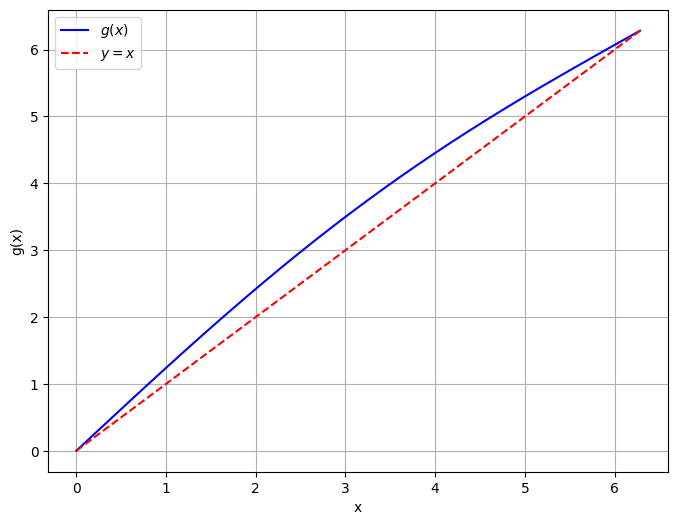

In [11]:
# Solución para la pregunta 7

import numpy as np
import matplotlib.pyplot as plt
import math


#Definir funcion g(x)
def g(x):
    return x + 0.5 * np.sin(x / 2)

#Metodo de Punto Fijo
def punto_fijo(g, x0, tol=1e-2, max_iter=100):
    x_n = x0
    iteraciones = [x_n]

    for _ in range(max_iter):
        x_n1 = g(x_n)  #Siguiente valor
        iteraciones.append(x_n1)

        if abs(x_n1 - x_n) < tol:  #Condicion de convergencia
            break

        x_n = x_n1

    return x_n1, iteraciones

#Intervalo [0, 2pi] y valor inicial x0
x0 = np.pi  #Valor inicial
x_fijo, iteraciones = punto_fijo(g, x0)

#Mostrar punto fijo
print(f"Punto fijo: {x_fijo}")

#Graficar
x_vals = np.linspace(0, 2 * np.pi, 400)
y_vals = g(x_vals)

plt.figure(figsize=(8, 6))

#Grafico de g(x)
plt.plot(x_vals, y_vals, label=r'$g(x)$', color='b')

#Linea y=x
plt.plot(x_vals, x_vals, label=r'$y=x$', color='r', linestyle='--')

#Mostrar grafico
plt.xlabel('x')
plt.ylabel('g(x)')
plt.legend()
plt.grid(True)
plt.show()


## 9. Usar el Método de Newton para hallar la solución de las siguientes funciones con una tolerancia de \( 10^{-5} \):

1. $f(x) = e^x + 2 - x + 2 \cos(x) - 6 = 0$ para  $1 \leq x \leq 2 $.
2. $f(x) = 2x \cos(2x) - (x - 2)^2 = 0 $ para $2 \leq x \leq 3$ y $3 \leq x \leq 4$.
3. $f(x) = e^x - 3x^2 = 0 $ para $0 \leq x \leq 1$ y $ 3 \leq x \leq 5.$


In [2]:
# Solución para la pregunta 9.

import numpy as np

# Definir la función y su derivada para cada caso

# 1. f(x) = e^x + 2 - x + 2 * cos(x) - 6
def f1(x):
    return np.exp(x) + 2 - x + 2 * np.cos(x) - 6

def df1(x):
    return np.exp(x) - 1 - 2 * np.sin(x)

# 2. f(x) = 2x * cos(2x) - (x - 2)^2
def f2(x):
    return 2 * x * np.cos(2 * x) - (x - 2)**2

def df2(x):
    return 2 * np.cos(2 * x) - 4 * x * np.sin(2 * x) - 2 * (x - 2)

# 3. f(x) = e^x - 3x^2
def f3(x):
    return np.exp(x) - 3 * x**2

def df3(x):
    return np.exp(x) - 6 * x

# Método de Newton
def newton_method(f, df, x0, tol=1e-5, max_iter=1000):
    x = x0
    for i in range(max_iter):
        x_new = x - f(x) / df(x)
        if abs(x_new - x) < tol:
            return x_new, i + 1  # Devolver el valor de la raíz y el número de iteraciones
        x = x_new
    return None, max_iter  # Si no converge, devolver None

# Soluciones para cada caso

# 1. f(x) = e^x + 2 - x + 2 * cos(x) - 6 para 1 <= x <= 2
x0_1 = 1.5  # Valor inicial en el intervalo [1, 2]
root1, iterations1 = newton_method(f1, df1, x0_1)
print(f"Solución 1: x = {root1:.6f}, Iteraciones = {iterations1}")

# 2. f(x) = 2x * cos(2x) - (x - 2)^2 para 2 <= x <= 3 y 3 <= x <= 4
x0_2 = 2.5  # Valor inicial en el intervalo [2, 3]
root2, iterations2 = newton_method(f2, df2, x0_2)
print(f"Solución 2: x = {root2:.6f}, Iteraciones = {iterations2}")

# 3. f(x) = e^x - 3x^2 para 0 <= x <= 1 y 3 <= x <= 5
x0_3 = 0.5  # Valor inicial en el intervalo [0, 1]
root3, iterations3 = newton_method(f3, df3, x0_3)
print(f"Solución 3: x = {root3:.6f}, Iteraciones = {iterations3}")


Solución 1: x = 1.861890, Iteraciones = 5
Solución 2: x = 2.370687, Iteraciones = 3
Solución 3: x = 0.910008, Iteraciones = 5


## 10. Calcular las raíces del ejercicio 9 con el método de Secante.

In [3]:
# Solución para la pregunta 10.

import numpy as np

# Definir la función para cada caso

# 1. f(x) = e^x + 2 - x + 2 * cos(x) - 6
def f1(x):
    return np.exp(x) + 2 - x + 2 * np.cos(x) - 6

# 2. f(x) = 2x * cos(2x) - (x - 2)^2
def f2(x):
    return 2 * x * np.cos(2 * x) - (x - 2)**2

# 3. f(x) = e^x - 3x^2
def f3(x):
    return np.exp(x) - 3 * x**2

# Método de la Secante
def secant_method(f, x0, x1, tol=1e-5, max_iter=1000):
    for i in range(max_iter):
        # Calcula el valor de la función en los dos puntos
        f_x0 = f(x0)
        f_x1 = f(x1)

        # Calcula el nuevo valor de x usando la fórmula de la secante
        if f_x1 - f_x0 == 0:
            return None, i + 1  # Evitar división por cero
        x2 = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)

        # Si la diferencia entre x2 y x1 es menor que la tolerancia, convergió
        if abs(x2 - x1) < tol:
            return x2, i + 1

        # Actualiza los valores para la siguiente iteración
        x0, x1 = x1, x2

    return None, max_iter  # Si no converge, devolver None

# Soluciones para cada caso

# 1. f(x) = e^x + 2 - x + 2 * cos(x) - 6 para 1 <= x <= 2
x0_1 = 1.5  # Valor inicial en el intervalo [1, 2]
x1_1 = 1.7  # Segundo valor inicial en el intervalo [1, 2]
root1, iterations1 = secant_method(f1, x0_1, x1_1)
print(f"Solución 1: x = {root1:.6f}, Iteraciones = {iterations1}")

# 2. f(x) = 2x * cos(2x) - (x - 2)^2 para 2 <= x <= 3 y 3 <= x <= 4
x0_2 = 2.5  # Valor inicial en el intervalo [2, 3]
x1_2 = 2.7  # Segundo valor inicial en el intervalo [2, 3]
root2, iterations2 = secant_method(f2, x0_2, x1_2)
print(f"Solución 2: x = {root2:.6f}, Iteraciones = {iterations2}")

# 3. f(x) = e^x - 3x^2 para 0 <= x <= 1 y 3 <= x <= 5
x0_3 = 0.5  # Valor inicial en el intervalo [0, 1]
x1_3 = 0.6  # Segundo valor inicial en el intervalo [0, 1]
root3, iterations3 = secant_method(f3, x0_3, x1_3)
print(f"Solución 3: x = {root3:.6f}, Iteraciones = {iterations3}")


Solución 1: x = 1.861890, Iteraciones = 6
Solución 2: x = 2.370687, Iteraciones = 4
Solución 3: x = 0.910008, Iteraciones = 6


## 11. El siguiente polinomio
$P(x) = 230x^4 + 18x^3 + 9x^2 - 221x - 9$

tiene dos ceros, uno en $[-1, 0]$ y otro en $[0, 1]$, hallarlos con una tolerancia de $10^{-6}$ para

a) Método de Secante

b) Método de Newton

Usando los programas de cada método.c


In [4]:
# Solución para la pregunta 11.
import numpy as np

# Definimos el polinomio P(x) y su derivada
def P(x):
    return 230 * x**4 + 18 * x**3 + 9 * x**2 - 221 * x - 9

def P_prime(x):
    return 920 * x**3 + 54 * x**2 + 18 * x - 221

# Método de Secante
def secant_method(f, x0, x1, tol=1e-6, max_iter=1000):
    for i in range(max_iter):
        # Calcula el valor de la función en los dos puntos
        f_x0 = f(x0)
        f_x1 = f(x1)

        # Calcula el nuevo valor de x usando la fórmula de la secante
        if f_x1 - f_x0 == 0:
            return None, i + 1  # Evitar división por cero
        x2 = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)

        # Si la diferencia entre x2 y x1 es menor que la tolerancia, convergió
        if abs(x2 - x1) < tol:
            return x2, i + 1

        # Actualiza los valores para la siguiente iteración
        x0, x1 = x1, x2

    return None, max_iter  # Si no converge, devolver None

# Método de Newton
def newton_method(f, f_prime, x0, tol=1e-6, max_iter=1000):
    for i in range(max_iter):
        # Calcula el valor de la función y su derivada en x0
        f_x0 = f(x0)
        f_prime_x0 = f_prime(x0)

        # Si la derivada es 0, evitar división por cero
        if f_prime_x0 == 0:
            return None, i + 1

        # Calcula el siguiente valor de x usando la fórmula de Newton
        x1 = x0 - f_x0 / f_prime_x0

        # Si la diferencia entre x1 y x0 es menor que la tolerancia, convergió
        if abs(x1 - x0) < tol:
            return x1, i + 1

        # Actualiza x0 para la siguiente iteración
        x0 = x1

    return None, max_iter  # Si no converge, devolver None

# Intervalos dados en el problema
# Primer cero en [-1, 0]
x0_secante_1 = -1.0  # Valor inicial en el intervalo [-1, 0]
x1_secante_1 = -0.5  # Segundo valor inicial en el intervalo [-1, 0]

x0_newton_1 = -1.0  # Valor inicial en el intervalo [-1, 0]

# Segundo cero en [0, 1]
x0_secante_2 = 0.5  # Valor inicial en el intervalo [0, 1]
x1_secante_2 = 0.75  # Segundo valor inicial en el intervalo [0, 1]

x0_newton_2 = 0.5  # Valor inicial en el intervalo [0, 1]

# Método de la Secante - Primer intervalo [-1, 0]
root_secante_1, iterations_secante_1 = secant_method(P, x0_secante_1, x1_secante_1)
print(f"Raíz con el Método de Secante (Intervalo [-1, 0]): x = {root_secante_1:.6f}, Iteraciones = {iterations_secante_1}")

# Método de la Secante - Segundo intervalo [0, 1]
root_secante_2, iterations_secante_2 = secant_method(P, x0_secante_2, x1_secante_2)
print(f"Raíz con el Método de Secante (Intervalo [0, 1]): x = {root_secante_2:.6f}, Iteraciones = {iterations_secante_2}")

# Método de Newton - Primer intervalo [-1, 0]
root_newton_1, iterations_newton_1 = newton_method(P, P_prime, x0_newton_1)
print(f"Raíz con el Método de Newton (Intervalo [-1, 0]): x = {root_newton_1:.6f}, Iteraciones = {iterations_newton_1}")

# Método de Newton - Segundo intervalo [0, 1]
root_newton_2, iterations_newton_2 = newton_method(P, P_prime, x0_newton_2)
print(f"Raíz con el Método de Newton (Intervalo [0, 1]): x = {root_newton_2:.6f}, Iteraciones = {iterations_newton_2}")



Raíz con el Método de Secante (Intervalo [-1, 0]): x = -0.040659, Iteraciones = 6
Raíz con el Método de Secante (Intervalo [0, 1]): x = 0.962398, Iteraciones = 10
Raíz con el Método de Newton (Intervalo [-1, 0]): x = -0.040659, Iteraciones = 6
Raíz con el Método de Newton (Intervalo [0, 1]): x = -0.040659, Iteraciones = 6


## 12. El control de un determinado sistema eléctrico conduce a la resolución del siguiente sistema de ecuaciones no lineales:

$I \cdot \cos(\varphi) = \frac{2}{3}$

$
\cos(\delta) + 0.91 \cdot I \cdot \sin(\varphi + \delta) = 1.22
$

$
0.76 \cdot I \cdot \cos(\varphi + \delta) = \sin(\delta)
$

Sabiendo que por consideraciones técnicas los ángulos $\varphi $ y $ \delta $ deben estar comprendidos entre $0 $ y $ \frac{\pi}{2} $ y que la densidad de corriente $ I $ debe ser positiva, se pide resolver mediante el método de Newton el sistema partiendo de los datos iniciales siguientes:


a) $I = 1, \varphi = 0.1 $ y $ \delta = 0.1 $.

b) $ I = \varphi = \delta = 1 $.


Comentar la admisibilidad de las soluciones encontradas.



In [5]:
# Solución para la pregunta 12.

import numpy as np
from scipy.optimize import fsolve

# Definir el sistema de ecuaciones no lineales
def sistema_ecuaciones(vars):
    I, phi, delta = vars
    eq1 = I * np.cos(phi) - 2/3
    eq2 = np.cos(delta) + 0.91 * I * np.sin(phi + delta) - 1.22
    eq3 = 0.76 * I * np.cos(phi + delta) - np.sin(delta)
    return [eq1, eq2, eq3]

# Definir el Jacobiano (matriz de derivadas parciales)
def jacobiano(vars):
    I, phi, delta = vars
    dI = np.cos(phi)
    dphi = -I * np.sin(phi)
    ddelta = 0
    eq1_dI = np.cos(phi)
    eq1_dphi = -I * np.sin(phi)
    eq1_ddelta = 0
    eq2_dI = 0.91 * np.sin(phi + delta)
    eq2_dphi = 0.91 * I * np.cos(phi + delta)
    eq2_ddelta = -np.sin(delta) + 0.91 * I * np.cos(phi + delta)
    eq3_dI = 0.76 * np.cos(phi + delta)
    eq3_dphi = -0.76 * I * np.sin(phi + delta)
    eq3_ddelta = 0.76 * I * np.cos(phi + delta) - np.cos(delta)

    return np.array([[eq1_dI, eq1_dphi, eq1_ddelta],
                     [eq2_dI, eq2_dphi, eq2_ddelta],
                     [eq3_dI, eq3_dphi, eq3_ddelta]])

# Condiciones iniciales para el caso a)
x0_a = np.array([1.0, 0.1, 0.1])

# Condiciones iniciales para el caso b)
x0_b = np.array([1.0, 1.0, 1.0])

# Resolviendo el sistema para el caso a)
sol_a = fsolve(sistema_ecuaciones, x0_a)
# Resolviendo el sistema para el caso b)
sol_b = fsolve(sistema_ecuaciones, x0_b)

# Mostrar las soluciones
print("Solución para a) [I=1, φ=0.1, δ=0.1]:")
print(f"I = {sol_a[0]}, φ = {sol_a[1]}, δ = {sol_a[2]}")

print("\nSolución para b) [I=1, φ=1, δ=1]:")
print(f"I = {sol_b[0]}, φ = {sol_b[1]}, δ = {sol_b[2]}")


Solución para a) [I=1, φ=0.1, δ=0.1]:
I = 0.6701311610817449, φ = 0.1017284215331269, δ = 0.44894138648323595

Solución para b) [I=1, φ=1, δ=1]:
I = 0.6701311610830863, φ = 0.10172842151909467, δ = 0.4489413864859813


## 13. Resolver los siguientes sistemas programando el Método de Newton para varias variables

a) Puntos iniciales $x_1 = 15$ y $x_2 = -2$

$
x_1 + x_2 \left( x_2 \left( 5 - x_2 \right) - 2 \right) = 13
$

$
x_1 + x_2 \left( x_2 \left( 1 + x_2 \right) + 14 \right) = 29
$

b) Puntos iniciales $x_1 = \frac{1 + \sqrt{3}}{2}$, $x_2 = \frac{1 - \sqrt{3}}{2}$ y $x_3 = \sqrt{3}$

$
x_1^2 + x_2^2 + x_3^2 = 5
$

$
x_1 + x_2 = 1
$
$
x_1 + x_3 = 3
$


In [6]:
# Solueción para la preunta 13.

import numpy as np
from scipy.optimize import fsolve

# Definir el sistema de ecuaciones para el caso a)
def sistema_a(vars):
    x1, x2 = vars
    eq1 = x1 + x2 * (x2 * (5 - x2) - 2) - 13
    eq2 = x1 + x2 * (x2 * (1 + x2) + 14) - 29
    return [eq1, eq2]

# Definir el sistema de ecuaciones para el caso b)
def sistema_b(vars):
    x1, x2, x3 = vars
    eq1 = x1**2 + x2**2 + x3**2 - 5
    eq2 = x1 + x2 - 1
    eq3 = x1 + x3 - 3
    return [eq1, eq2, eq3]

# Puntos iniciales para el caso a)
x0_a = np.array([15, -2])

# Puntos iniciales para el caso b)
x0_b = np.array([(1 + np.sqrt(3)) / 2, (1 - np.sqrt(3)) / 2, np.sqrt(3)])

# Resolviendo el sistema para el caso a)
sol_a = fsolve(sistema_a, x0_a)

# Resolviendo el sistema para el caso b)
sol_b = fsolve(sistema_b, x0_b)

# Mostrar las soluciones
print("Solución para el caso a) [x1=15, x2=-2]:")
print(f"x1 = {sol_a[0]}, x2 = {sol_a[1]}")

print("\nSolución para el caso b) [x1=(1+√3)/2, x2=(1-√3)/2, x3=√3]:")
print(f"x1 = {sol_b[0]}, x2 = {sol_b[1]}, x3 = {sol_b[2]}")


Solución para el caso a) [x1=15, x2=-2]:
x1 = 10.265301021098466, x2 = 1.1396805819963343

Solución para el caso b) [x1=(1+√3)/2, x2=(1-√3)/2, x3=√3]:
x1 = 0.9999999999999978, x2 = 2.2137894900806485e-15, x3 = 2.000000000000002


## 14. Para la función del ejercicio 13. b) resolverlo por la iteración de punto fijo.

In [7]:
# Solución para la pregunta 14.

import numpy as np

# Funciones de punto fijo para el sistema del inciso b
def g1(x2, x3):
    return np.sqrt(5 - x2**2 - x3**2)

def g2(x1):
    return 1 - x1

def g3(x1):
    return 3 - x1

# Método de iteración de punto fijo
def punto_fijo(g1, g2, g3, x0, tol=1e-6, max_iter=100):
    x1, x2, x3 = x0
    for _ in range(max_iter):
        # Calculamos las nuevas aproximaciones
        x1_new = g1(x2, x3)
        x2_new = g2(x1_new)
        x3_new = g3(x1_new)

        # Verificamos si las soluciones han convergido
        if np.allclose([x1_new, x2_new, x3_new], [x1, x2, x3], atol=tol):
            return x1_new, x2_new, x3_new

        # Actualizamos los valores para la siguiente iteración
        x1, x2, x3 = x1_new, x2_new, x3_new

    raise ValueError("No se alcanzó la convergencia después de 100 iteraciones")

# Puntos iniciales para el sistema b)
x0_b = np.array([(1 + np.sqrt(3)) / 2, (1 - np.sqrt(3)) / 2, np.sqrt(3)])

# Resolviendo el sistema por iteración de punto fijo
sol_b = punto_fijo(g1, g2, g3, x0_b)

# Mostrar la solución
print(f"Solución para el sistema b): x1 = {sol_b[0]}, x2 = {sol_b[1]}, x3 = {sol_b[2]}")



Solución para el sistema b): x1 = 1.6666645221814995, x2 = -0.6666645221814995, x3 = 1.3333354778185005
